## 랜덤 포레스트 회귀모형

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
from GraphicSetting import *
import hds_stats as hds

### 실습 데이터셋 준비

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python/MachineLearning/code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z', 'Univ_Admit.z', 'Cereal_Dataset.z']

In [5]:
# 회귀모형 실습 데이터셋을 호출합니다.
df = joblib.load(filename = 'Used_Cars_Price.z')

### 입력변수 행렬과 목표변수 벡터로 분리

In [13]:
# df의 처음 5행을 출력합니다.
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,False,True,False
1,13750,23,72937,90,1,0,2000,3,1165,False,True,False
2,13950,24,41711,90,1,0,2000,3,1165,False,True,False
3,14950,26,48000,90,0,0,2000,3,1165,False,True,False
4,13750,30,38500,90,0,0,2000,3,1170,False,True,False


In [14]:
# 목표변수명을 yvar에 할당합니다.
yvar = 'Price'

In [15]:
# 데이터프레임을 입력변수 행렬과 목표변수 벡터로 분리합니다.
X = df.drop(columns = yvar)
y = df[yvar].copy()

### 실습 데이터셋 분할

In [16]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [17]:
# 전체 데이터셋의 80%를 훈련셋, 20%를 검증셋으로 분할합니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.2, random_state = 0
)

### 훈련셋과 검증셋 확인

In [18]:
# 훈련셋 입력변수 행렬의 크기를 확인합니다.
X_train.shape

(1014, 11)

In [19]:
# 검증셋 입력변수 행렬의 크기를 확인합니다.
X_valid.shape

(254, 11)

In [20]:
# 훈련셋 목표변수의 평균을 확인합니다.
y_train.mean()

9702.940828402367

In [21]:
# 검증셋 목표변수의 평균을 확인합니다.
y_valid.mean()

9672.53937007874

### 랜덤 포레스트 회귀모형 적합

In [22]:
# 관련 라이브러리를 호출합니다.
from sklearn.ensemble import RandomForestRegressor

In [23]:
# 랜덤 포레스트 회귀모형을 설정합니다.
model = RandomForestRegressor(
    n_estimators = 50,
    max_features = 3,
    oob_score = True,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state = 0
)

In [24]:
# 훈련셋으로 랜덤 포레스트 회귀모형을 적합합니다.
model.fit(X = X_train, y = y_train)

RandomForestRegressor(max_features=3, n_estimators=50, oob_score=True,
                      random_state=0)

In [25]:
# 랜덤 포레스트 회귀모형의 파라미터를 확인합니다.
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [26]:
# 랜덤 포레스트 회귀모형의 훈련셋 결정계수를 확인합니다.
model.score(X = X_train, y = y_train)

0.9620544591200016

In [27]:
# 랜덤 포레스트 회귀모형의 검증셋 결정계수를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7534697282122839

### OOB 결정계수 시각화

In [28]:
# 반복문을 실행할 나무모형 개수의 범위를 지정합니다.
ntrees = np.arange(1, 51, 1)

In [29]:
# OOB 정확도를 저장할 빈 리스트를 생성합니다.
scores = []

In [30]:
# 반복문으로 나무모형 개수를 바꿔가면서 OOB 결정계수를 리스트에 추가합니다.
for ntree in ntrees:
    model.set_params(n_estimators = ntree)
    model.fit(X = X_train, y = y_train)
    scores.append(model.oob_score_)

/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserW

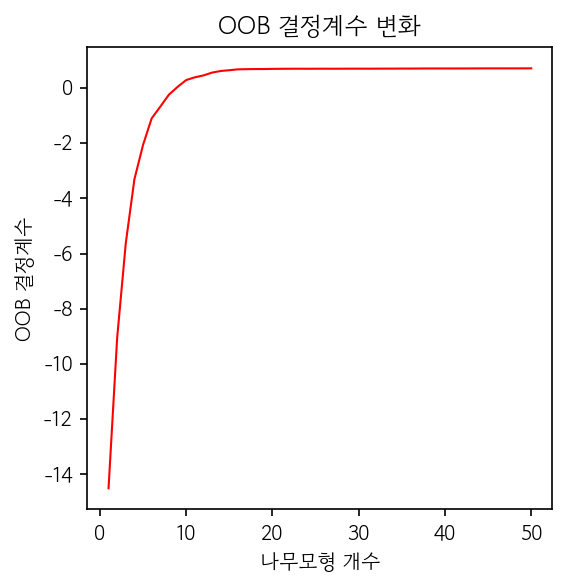

In [31]:
# OOB 결정계수로 선 그래프를 그립니다.
sns.lineplot(x = ntrees, y = scores, color = 'red', lw = 1)
plt.title(label = 'OOB 결정계수 변화')
plt.xlabel(xlabel = '나무모형 개수')
plt.ylabel(ylabel = 'OOB 결정계수');

### 랜덤 포레스트 회귀모형 특성 중요도

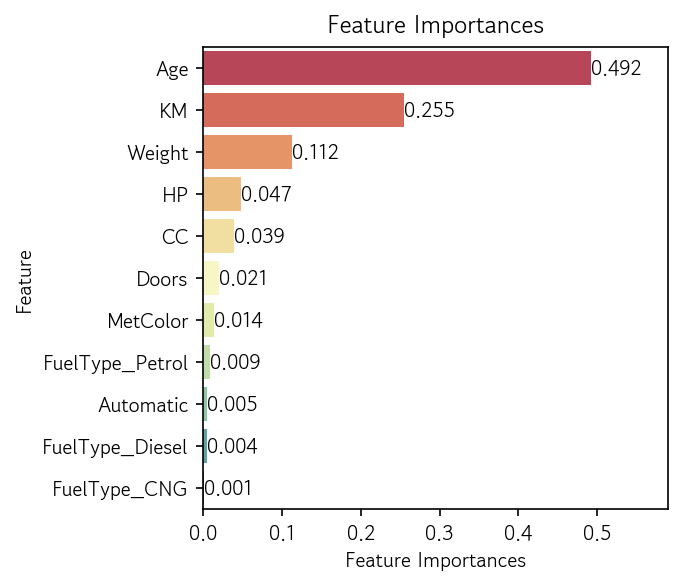

In [32]:
# 랜덤 포레스트 회귀모형 특성 중요도로 막대 그래프를 그립니다.
hds.ml.plot_feature_importance(model = model, pal = 'Spectral')

### 회귀모형 성능 평가

In [33]:
# 랜덤 포레스트 회귀모형의 검증셋 추정값을 생성합니다.
y_vpred1 = model.predict(X = X_valid)

In [34]:
# 랜덤 포레스트 회귀모형의 성능지표를 출력합니다.
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.082295e+06,1040.334318,0.012493,0.111772,812.276299,0.088222


## End of Document